In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np

import random
import os
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
import gc 

plt.rcParams["figure.figsize"] = (20,20)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16448\663694884.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
ANNO_FILE = "lens_finding/SpaceBasedTraining/classifications.csv"

In [3]:

def read_fits_file(file_name):
    fits_file = fits.open(file_name)
    data = fits_file["PRIMARY"].data
    return data

def display_multi_images(file_list, rows=3,columns=3,fig_size=None):
  if fig_size:
    fig = plt.figure(figsize=fig_size)
  else:
    fig = plt.figure()

  
  for i in range(1, columns*rows +1):
    fig_path = f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{file_list[i-1]}.fits"
    img = read_fits_file(fig_path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

In [4]:
anno_file = pd.read_csv(ANNO_FILE)
anno_file

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma
0,100000,1,8.633760e-10,171,195.4290
1,100001,1,1.317890e-10,294,855.5890
2,100002,1,4.877250e-12,140,486.1130
3,100003,1,1.440160e-09,1500,10467.4000
4,100004,0,2.197350e-11,0,0.0000
...,...,...,...,...,...
17995,117995,1,4.428430e-11,35,68.9357
17996,117996,0,1.937930e-11,0,0.0000
17997,117997,1,5.505060e-11,520,1145.4500
17998,117998,1,9.624780e-12,109,434.6310


In [5]:
true_ids = np.asarray(anno_file.loc[anno_file["is_lens"] == 1]["ID"])
false_ids = np.asarray(anno_file.loc[anno_file["is_lens"] == 0]["ID"])

In [6]:
true_ids.shape,false_ids.shape

((12574,), (5426,))

## Analysis with Lens

In [7]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 1]["ID"],15)
ids

array([110224, 106257, 106017, 116359, 116355, 112523, 105883, 106719,
       101034, 111451, 107491, 105900, 102491, 104338, 104382],
      dtype=int64)

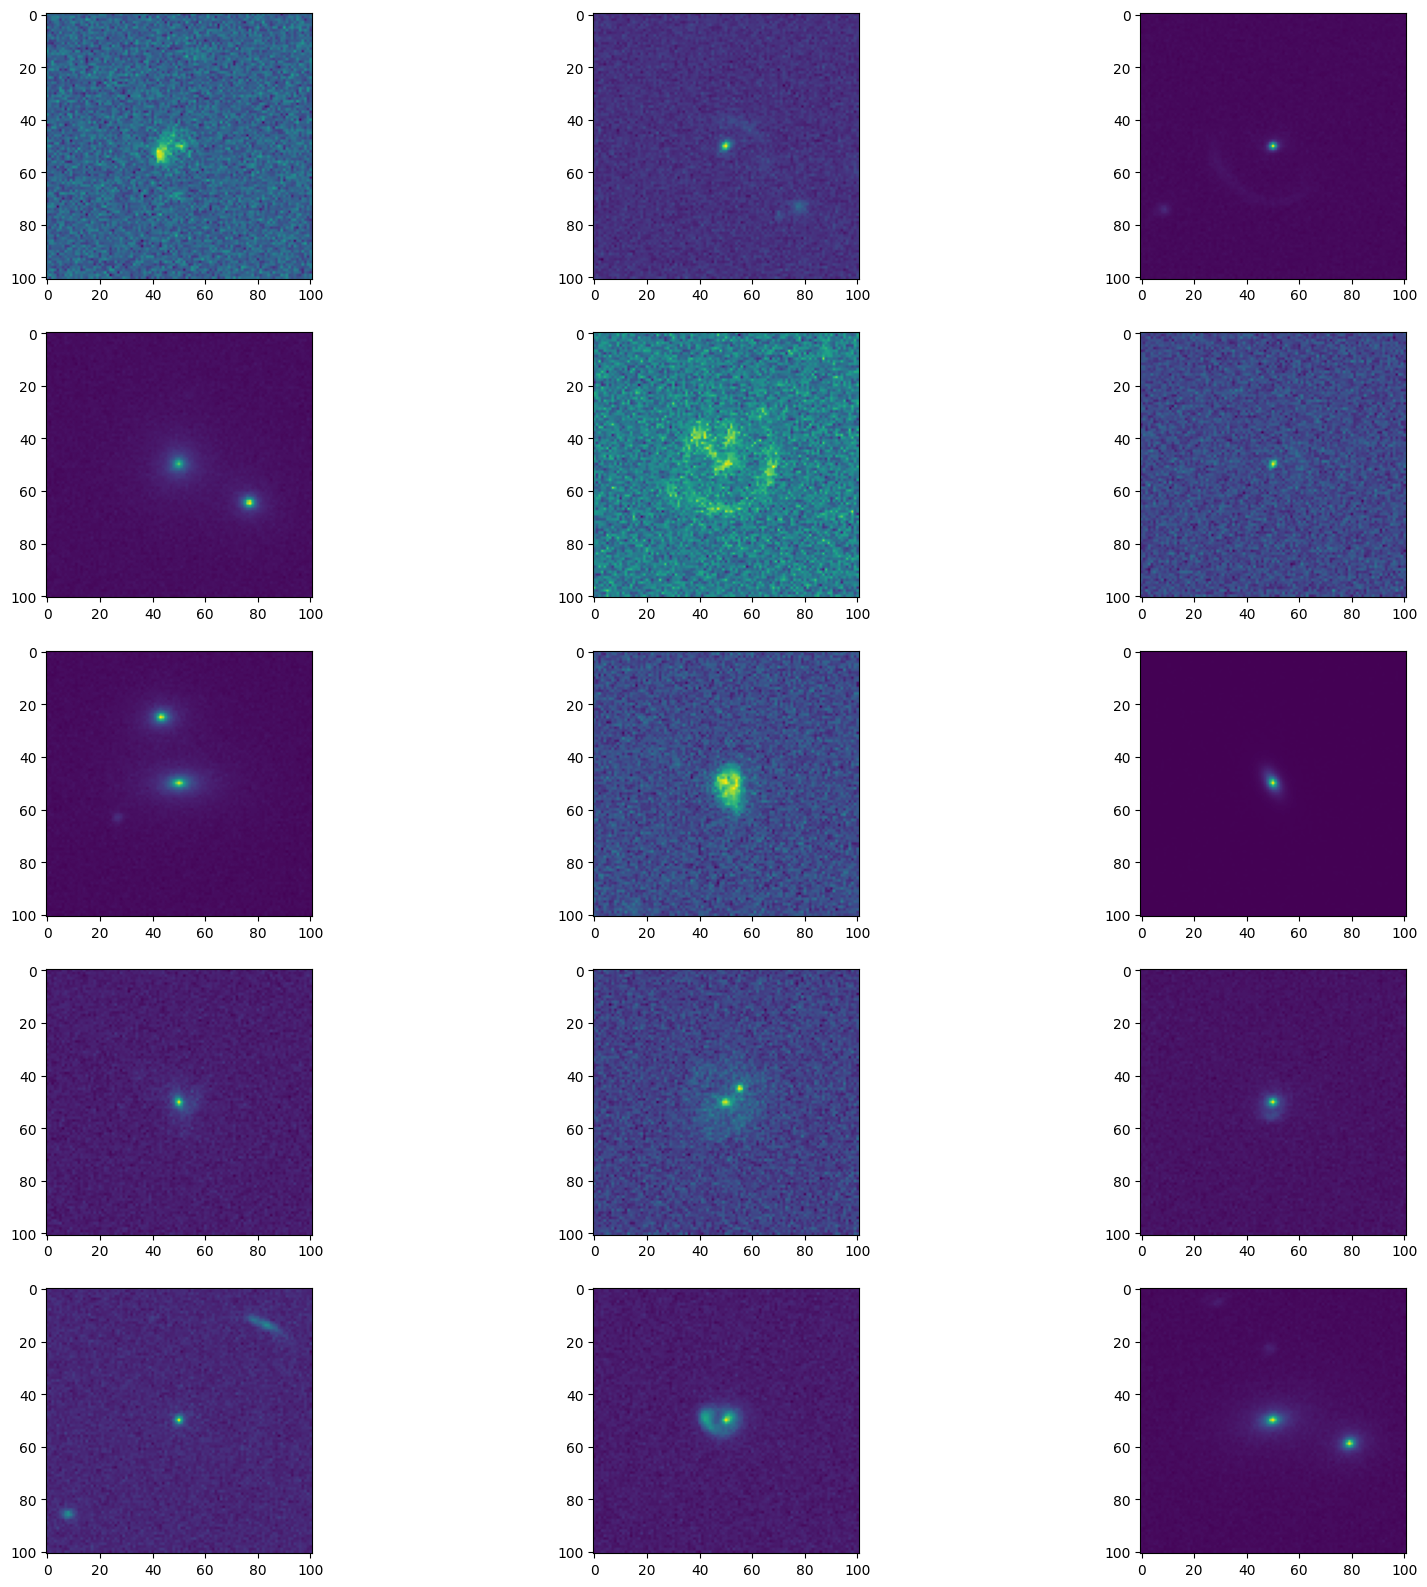

In [8]:
display_multi_images(ids,rows=5,columns=3)

## Analysis with Without Lens

In [9]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 0]["ID"],9)
ids

array([110862, 112662, 107704, 109606, 109227, 102867, 117685, 113142,
       110486], dtype=int64)

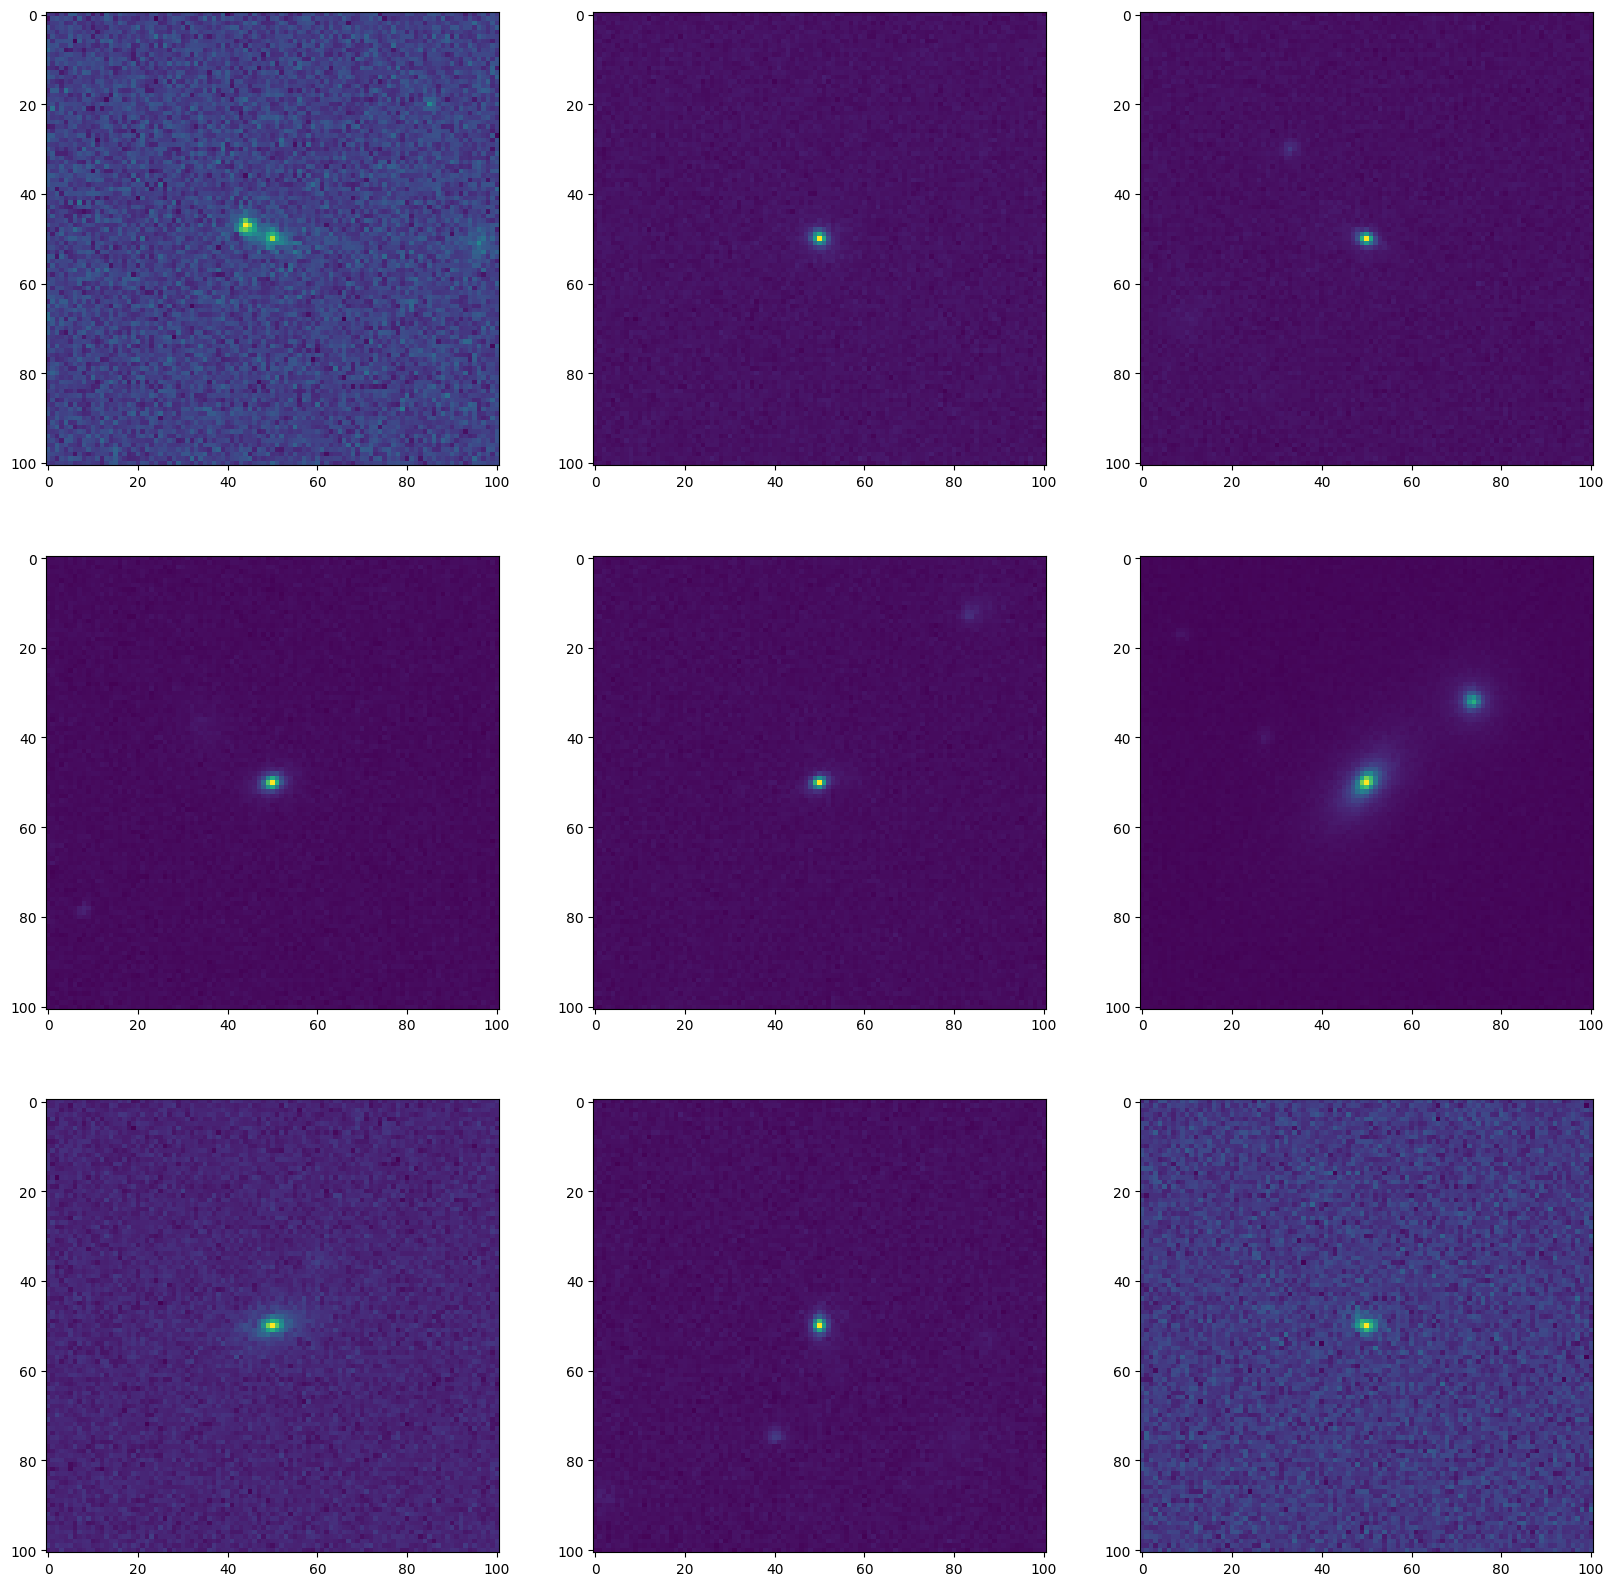

In [10]:
display_multi_images(ids)

## Get Mean and std

In [15]:
pos_count = anno_file.loc[anno_file["is_lens"] == 1].shape[0]
neg_count = anno_file.loc[anno_file["is_lens"] == 0].shape[0]
total_count = pos_count+neg_count

pos_count,neg_count,total_count

(12574, 5426, 18000)

In [28]:
mean_img = np.zeros((101,101))
pos_mean_img = np.zeros((101,101))
neg_mean_img = np.zeros((101,101))

mean2_img = np.zeros((101,101))
pos_mean2_img = np.zeros((101,101))
neg_mean2_img = np.zeros((101,101))

for i,ind in tqdm(enumerate(anno_file.index),desc="Read Indexes:- ",total=len(anno_file.index)):
    lbl = anno_file.loc[ind,"is_lens"]
    file_index = anno_file.loc[ind,"ID"]
    fig_path = f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{file_index}.fits"
    img = read_fits_file(fig_path)
    
    mean_img += img
    mean2_img += img**2
    if lbl == 1:
        pos_mean_img += img
        pos_mean2_img += img**2
    else:
        neg_mean_img += img
        neg_mean2_img += img**2
        
mean_img = mean_img/total_count
pos_mean_img = pos_mean_img/pos_count
neg_mean_img = neg_mean_img/neg_count

mean2_img = mean2_img/total_count
pos_mean2_img = pos_mean2_img/pos_count
neg_mean2_img = neg_mean2_img/neg_count

std_img = mean2_img - mean_img**2
std_pos_img = pos_mean2_img - pos_mean_img**2
std_neg_img = neg_mean2_img - neg_mean_img**2

Read Indexes:- :   0%|          | 0/18000 [00:00<?, ?it/s]

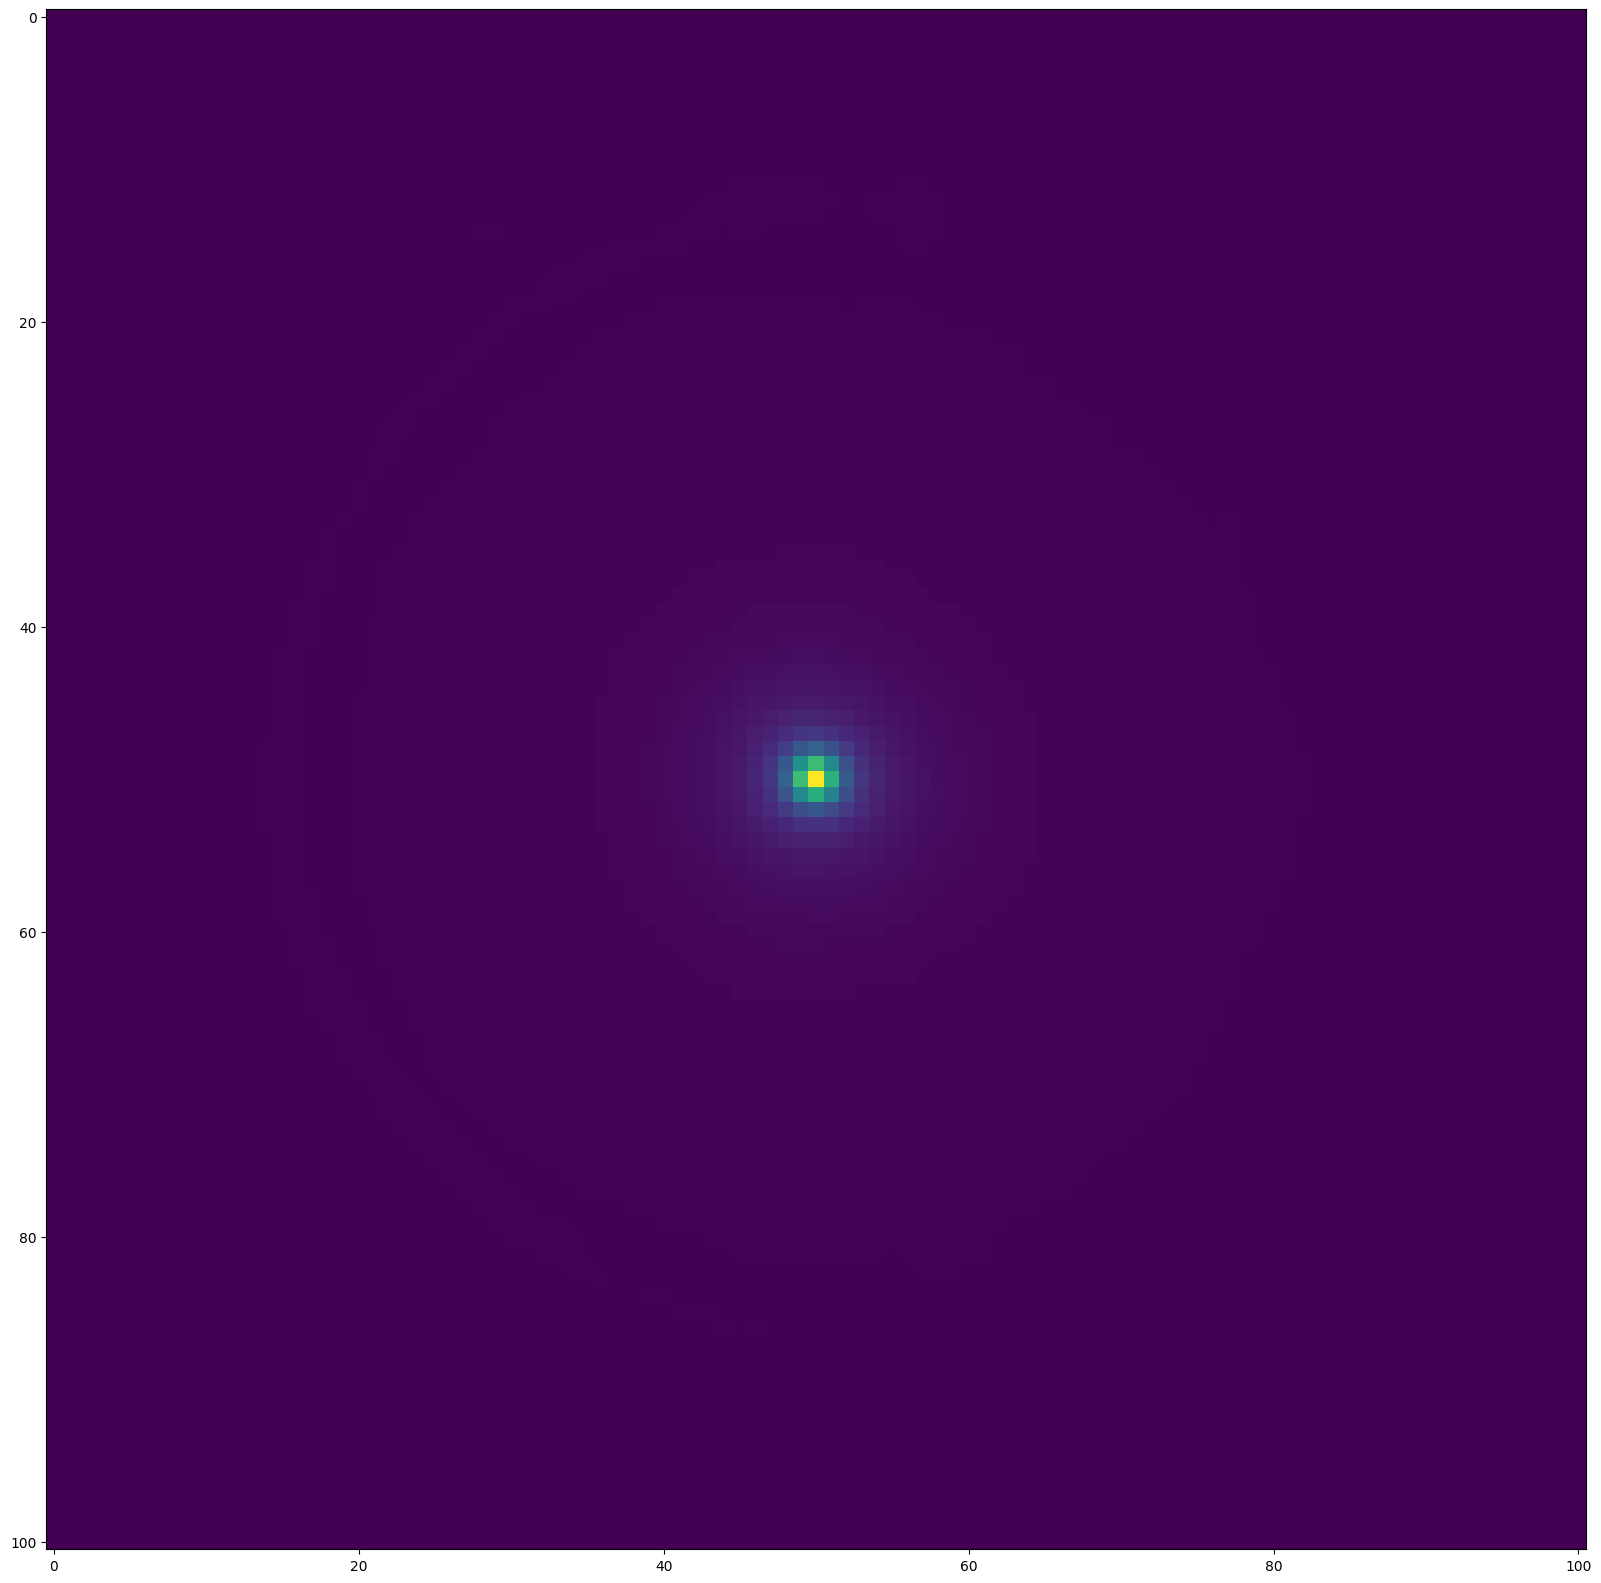

In [29]:
plt.imshow(mean_img)

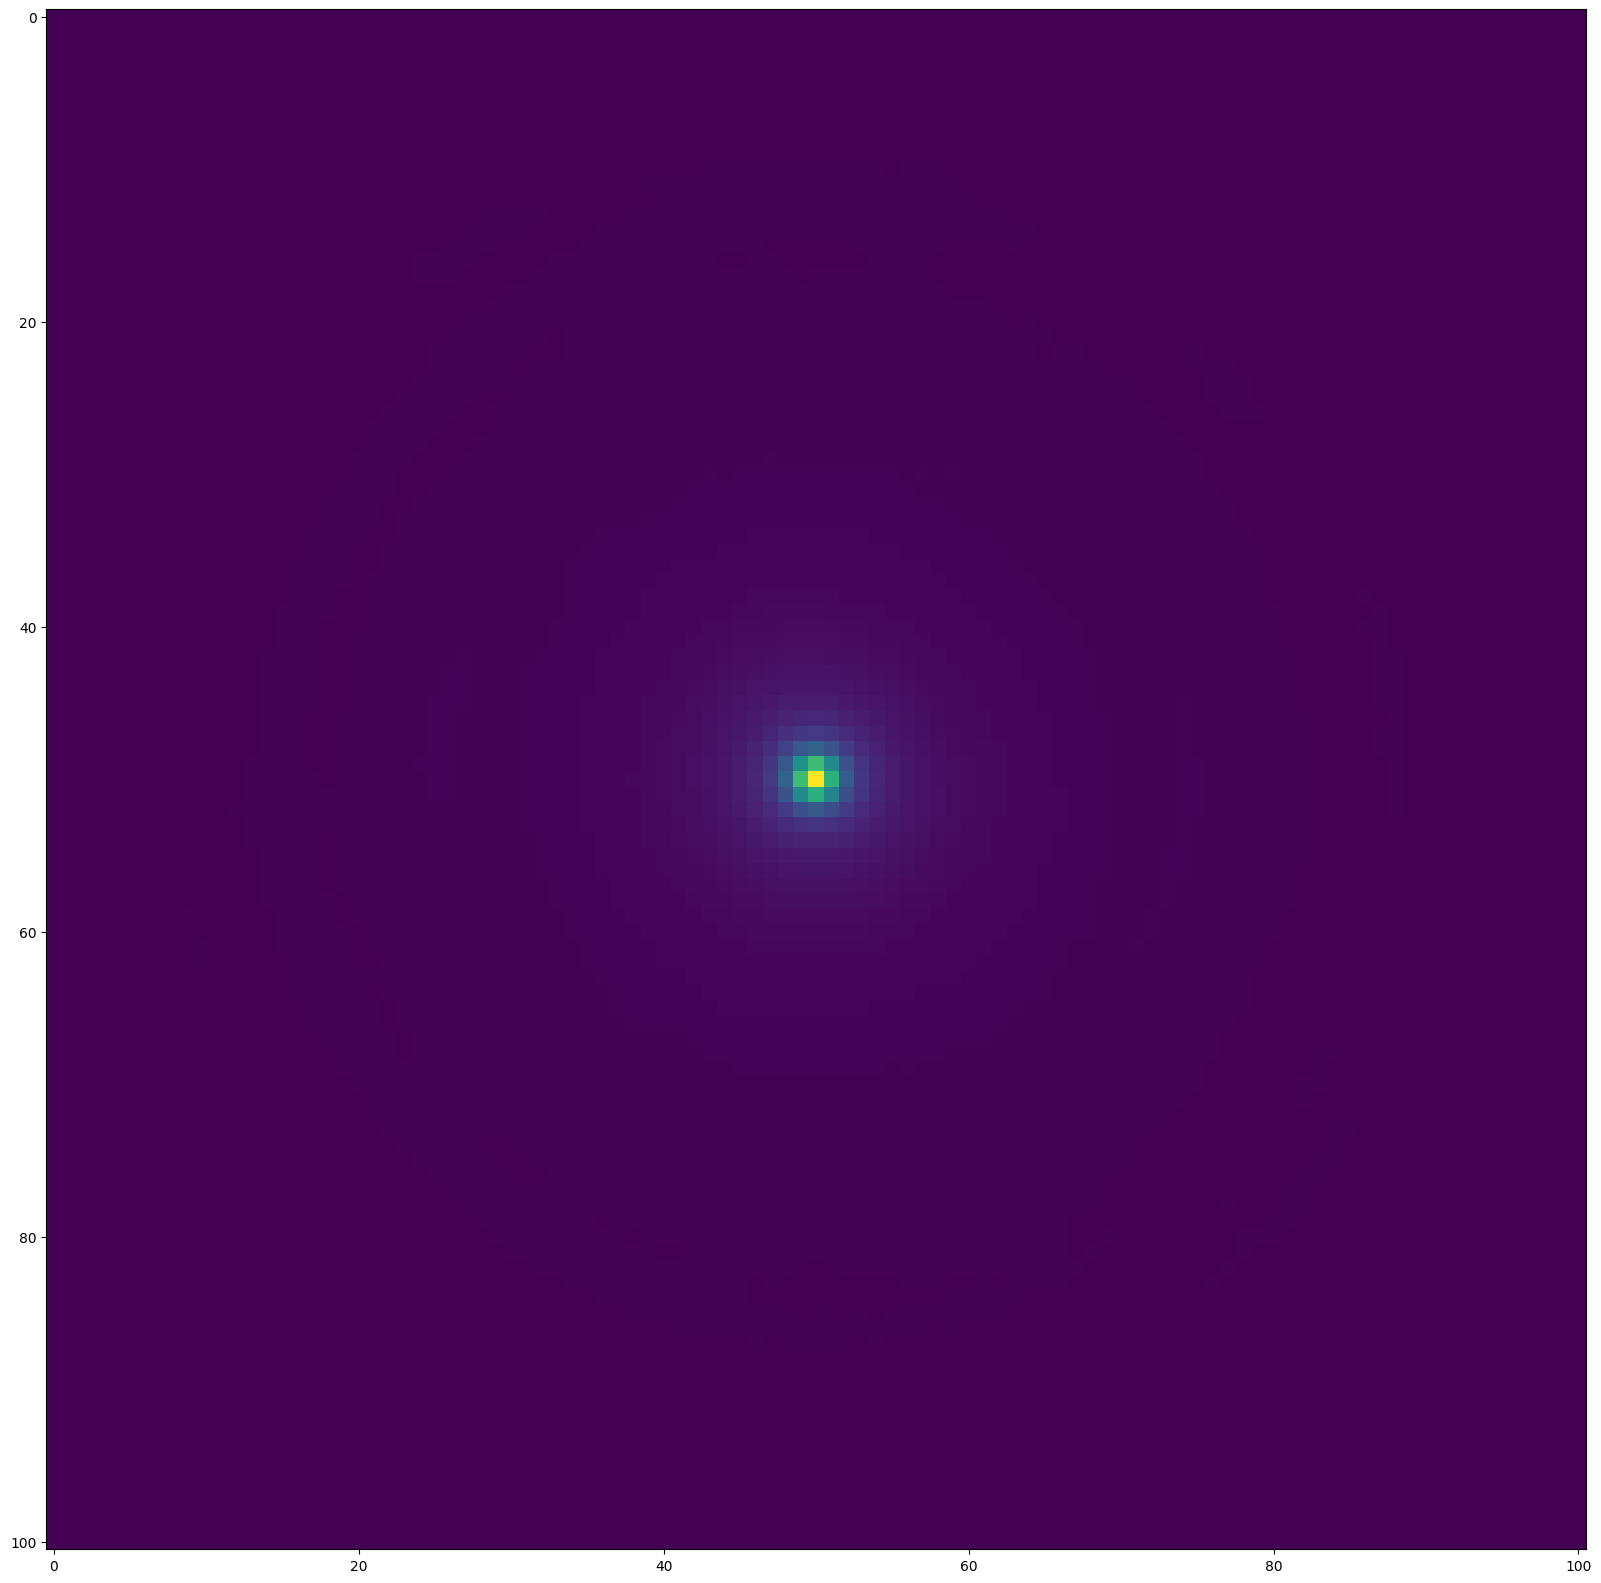

In [30]:
plt.imshow(pos_mean_img)

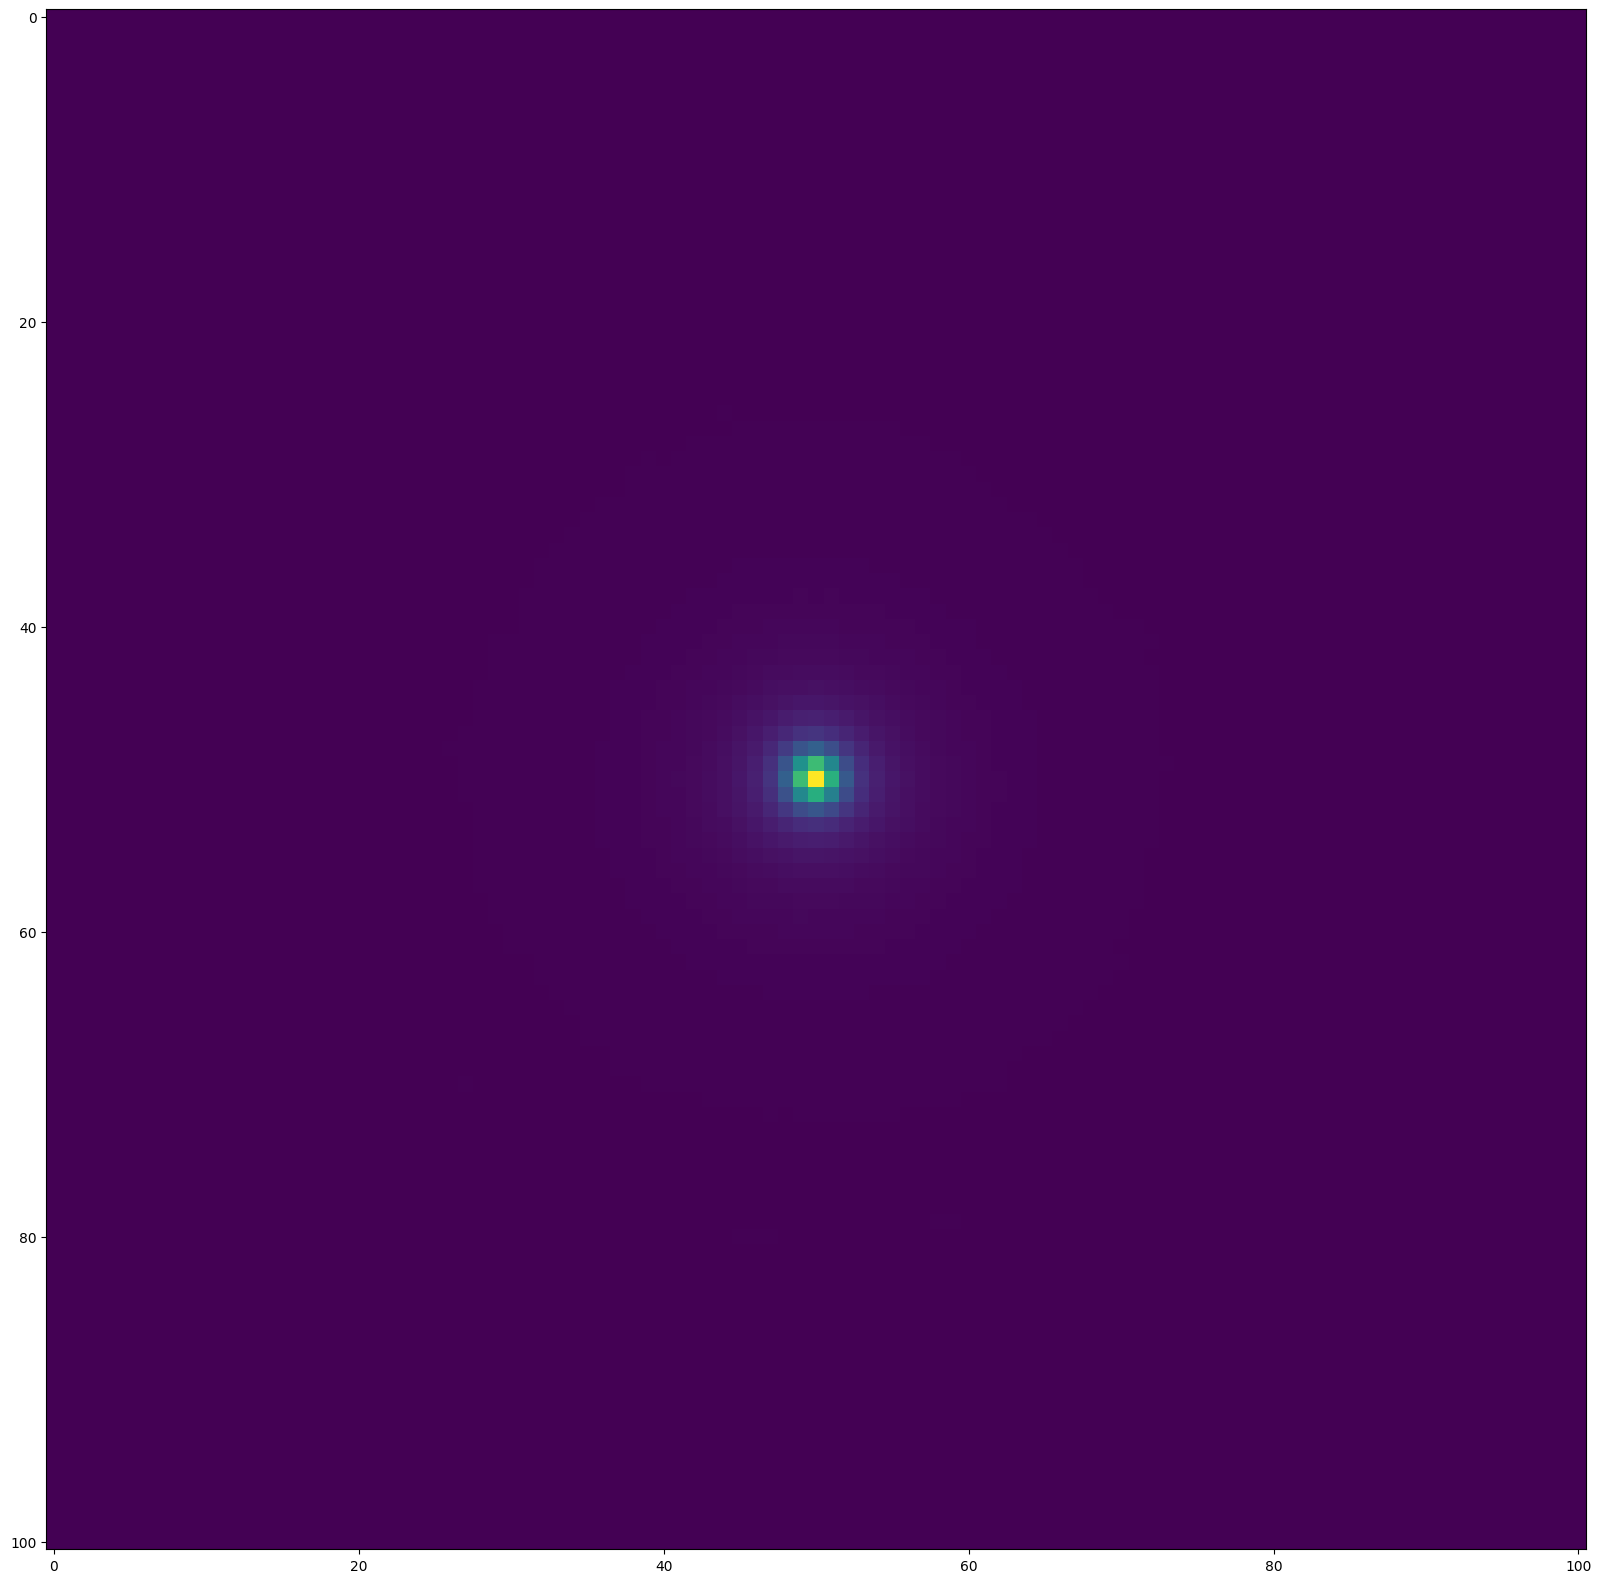

In [31]:
plt.imshow(neg_mean_img)

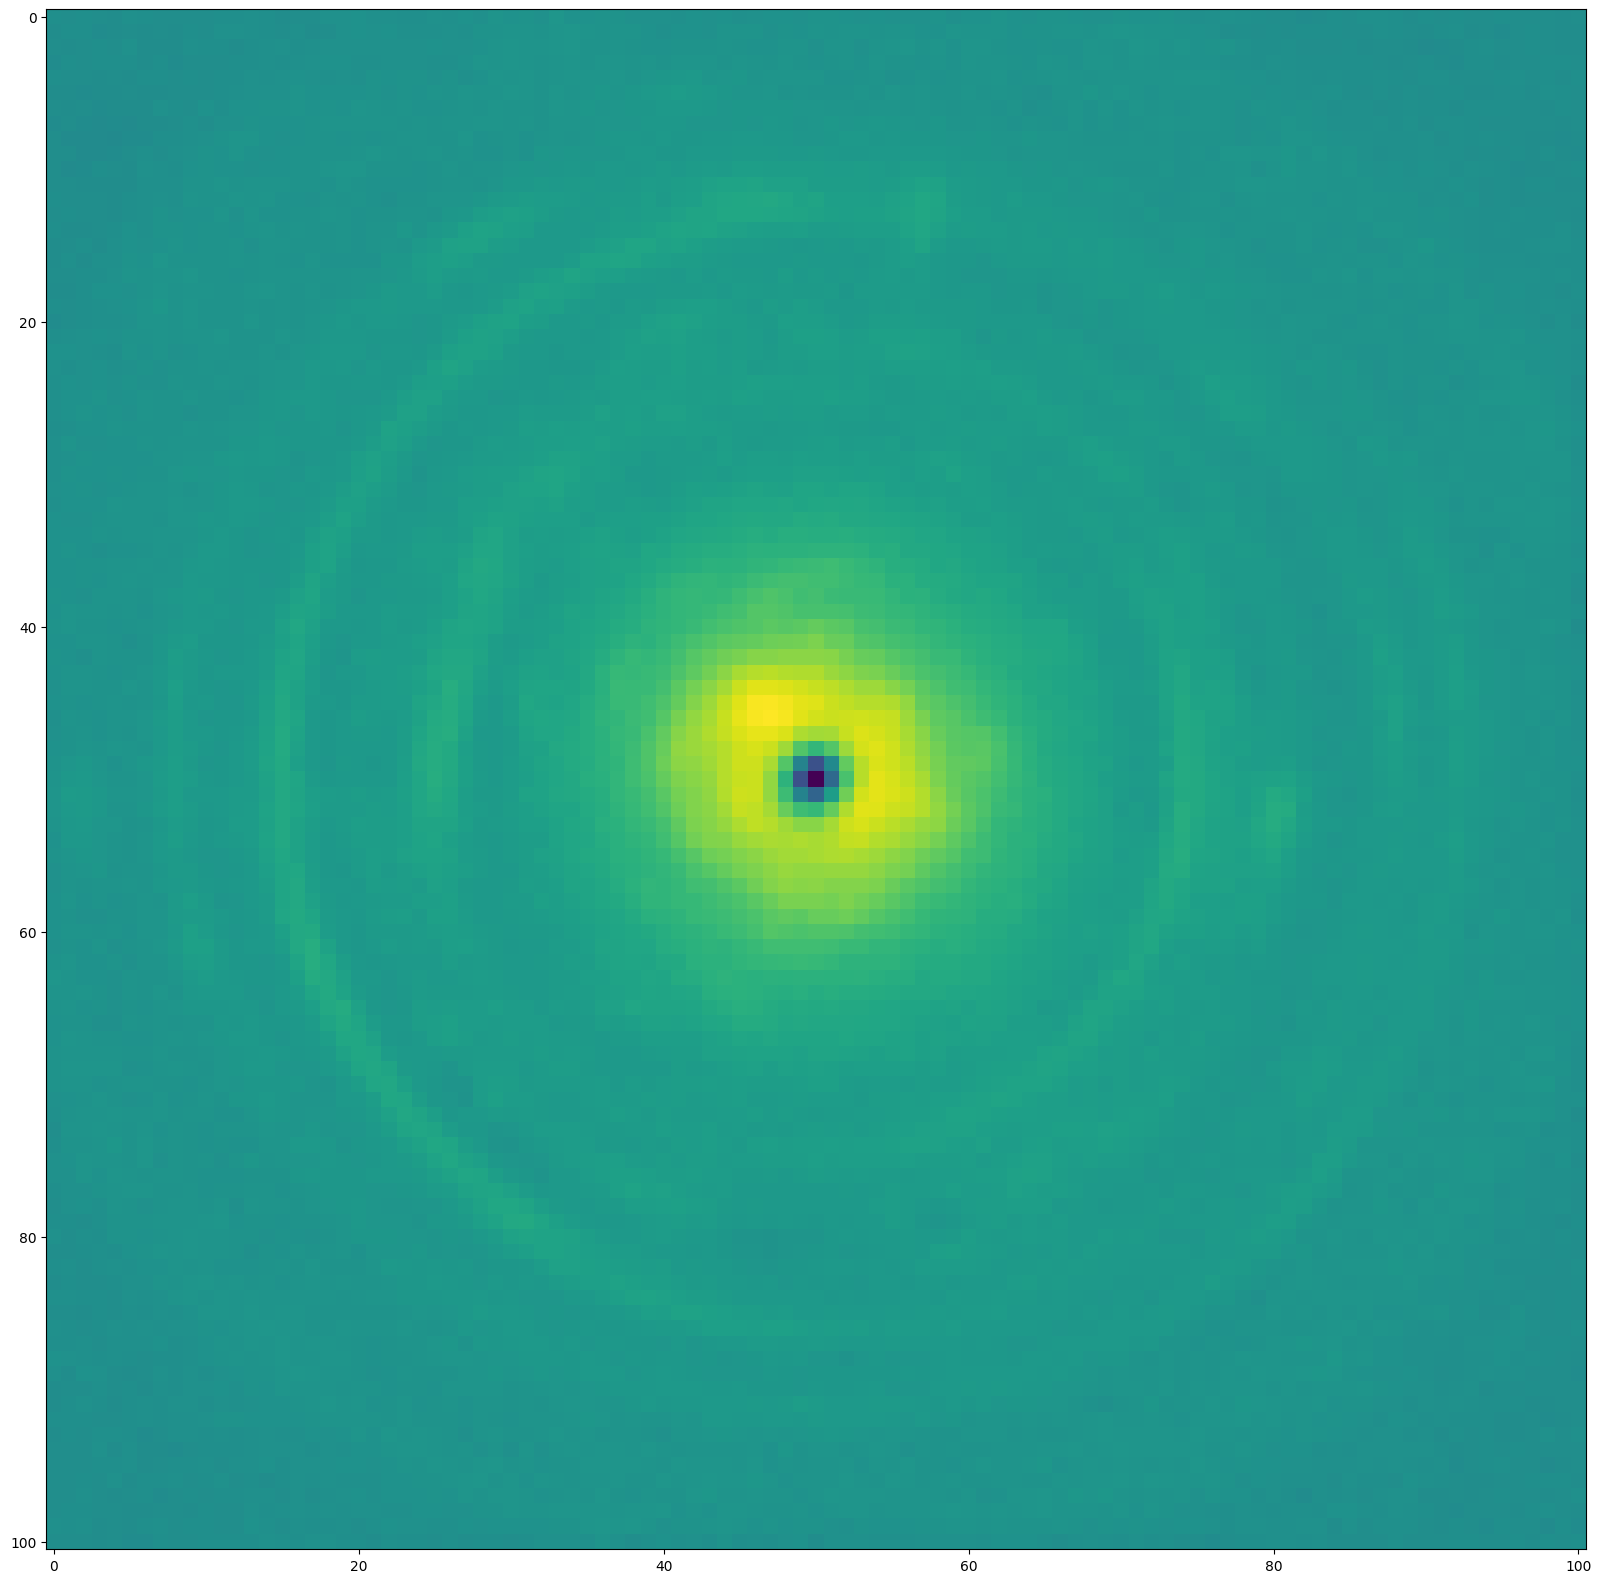

In [32]:
plt.imshow(pos_mean_img - neg_mean_img)

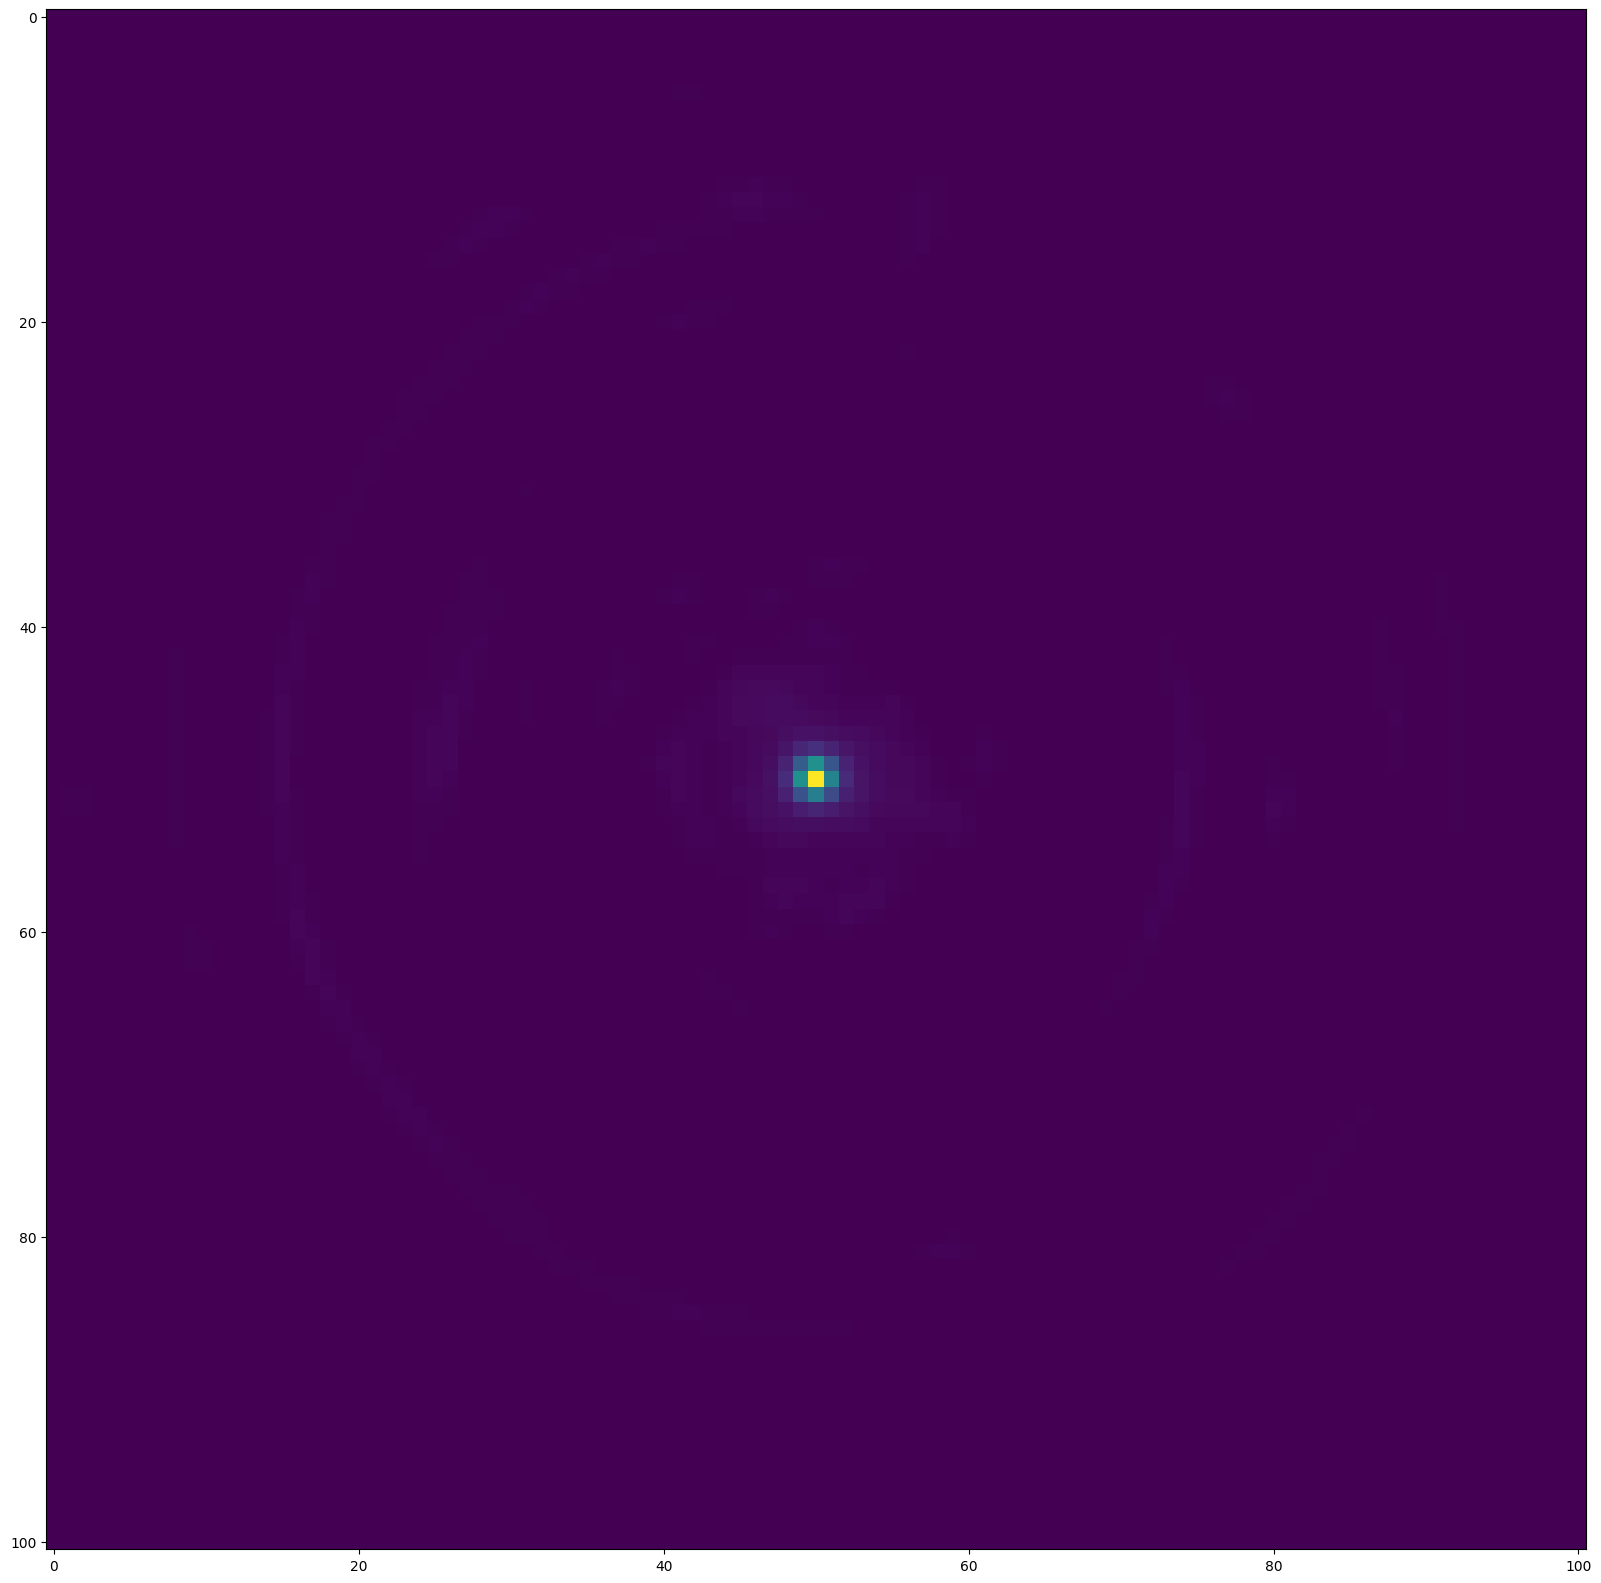

In [33]:
plt.imshow(std_img)

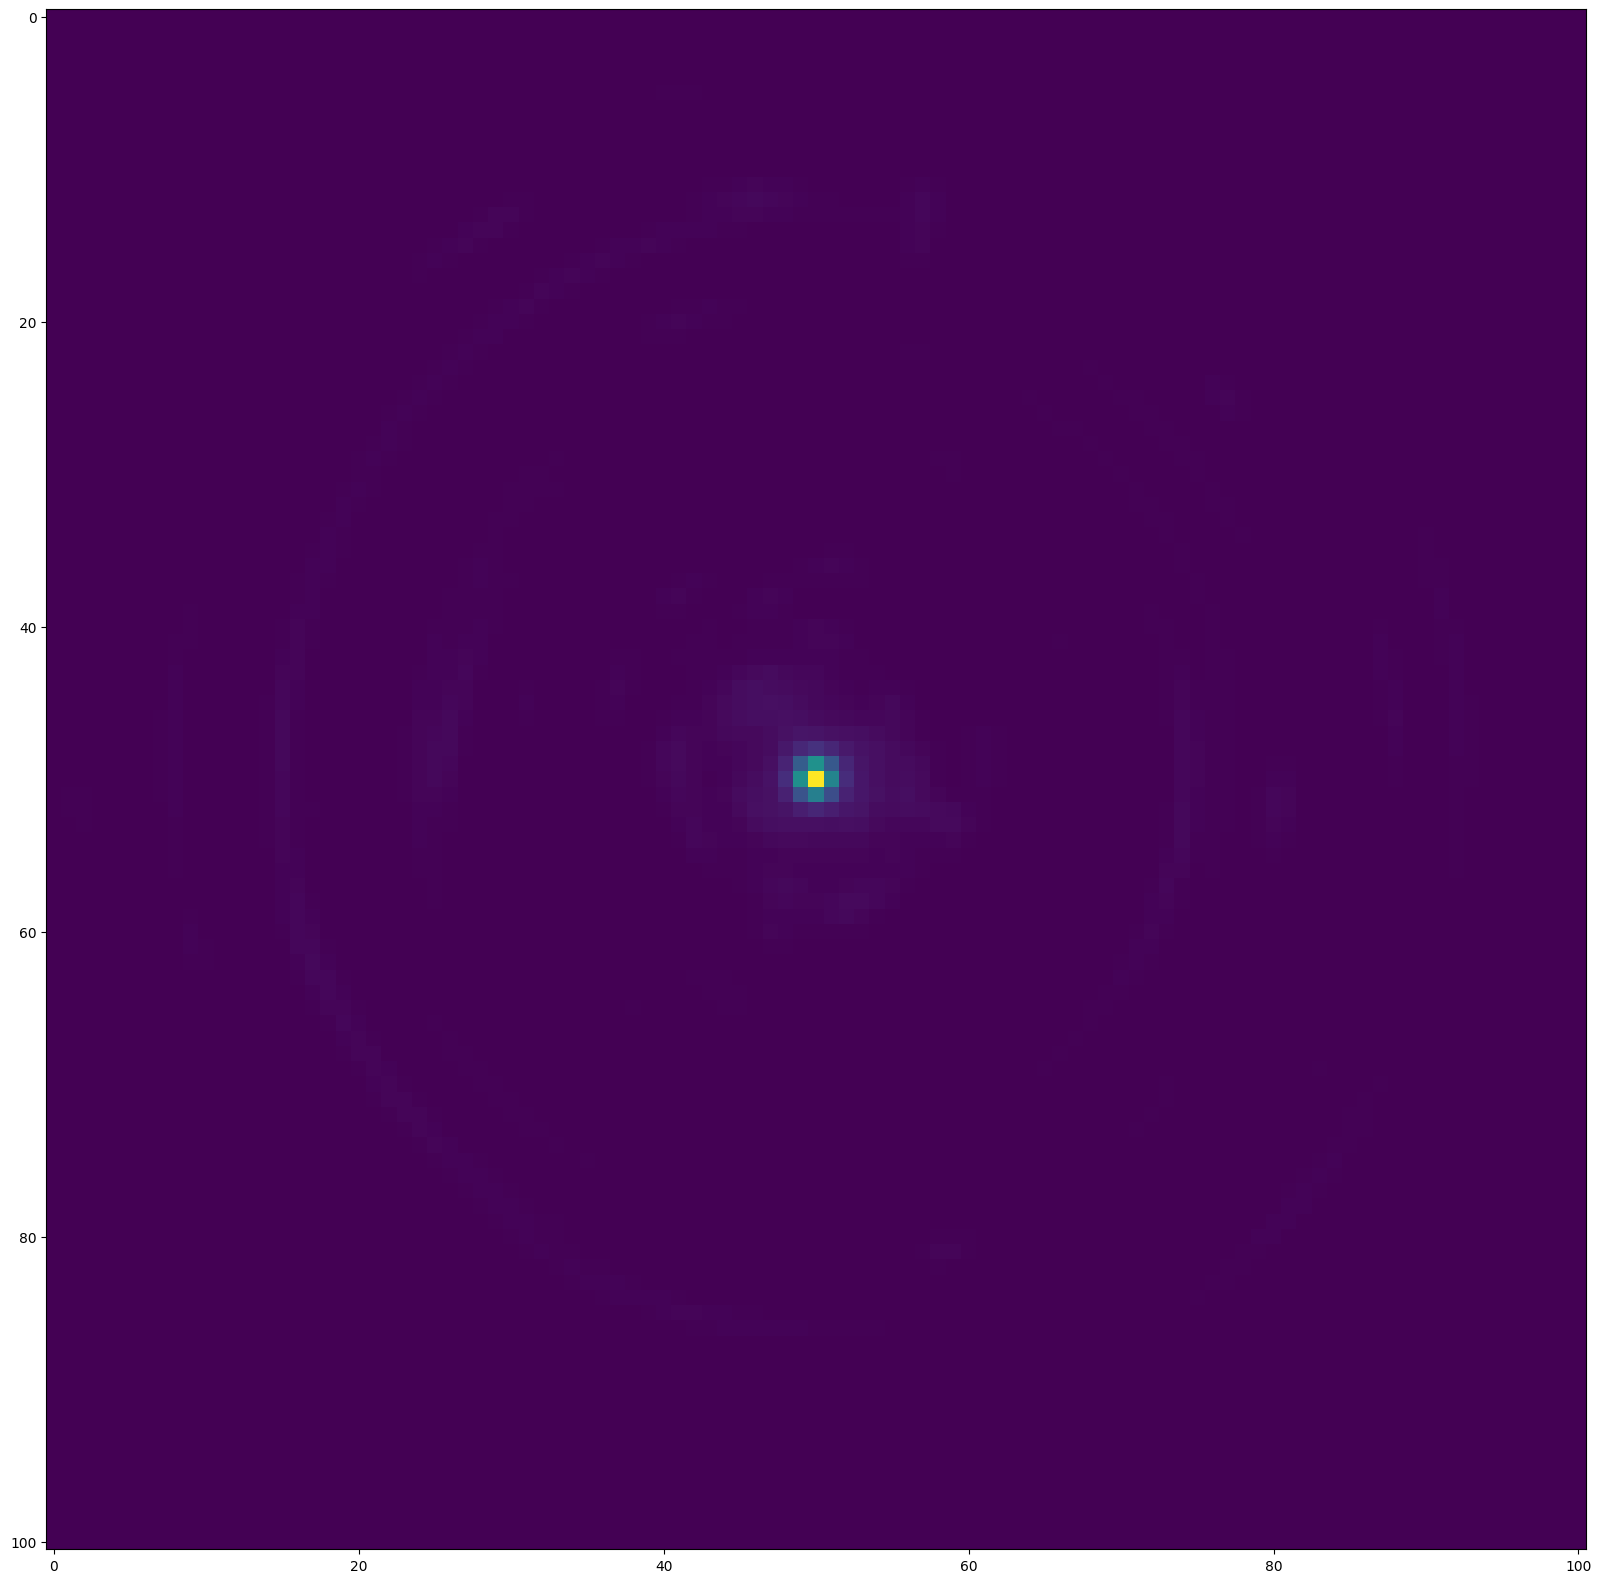

In [35]:
plt.imshow(std_pos_img)

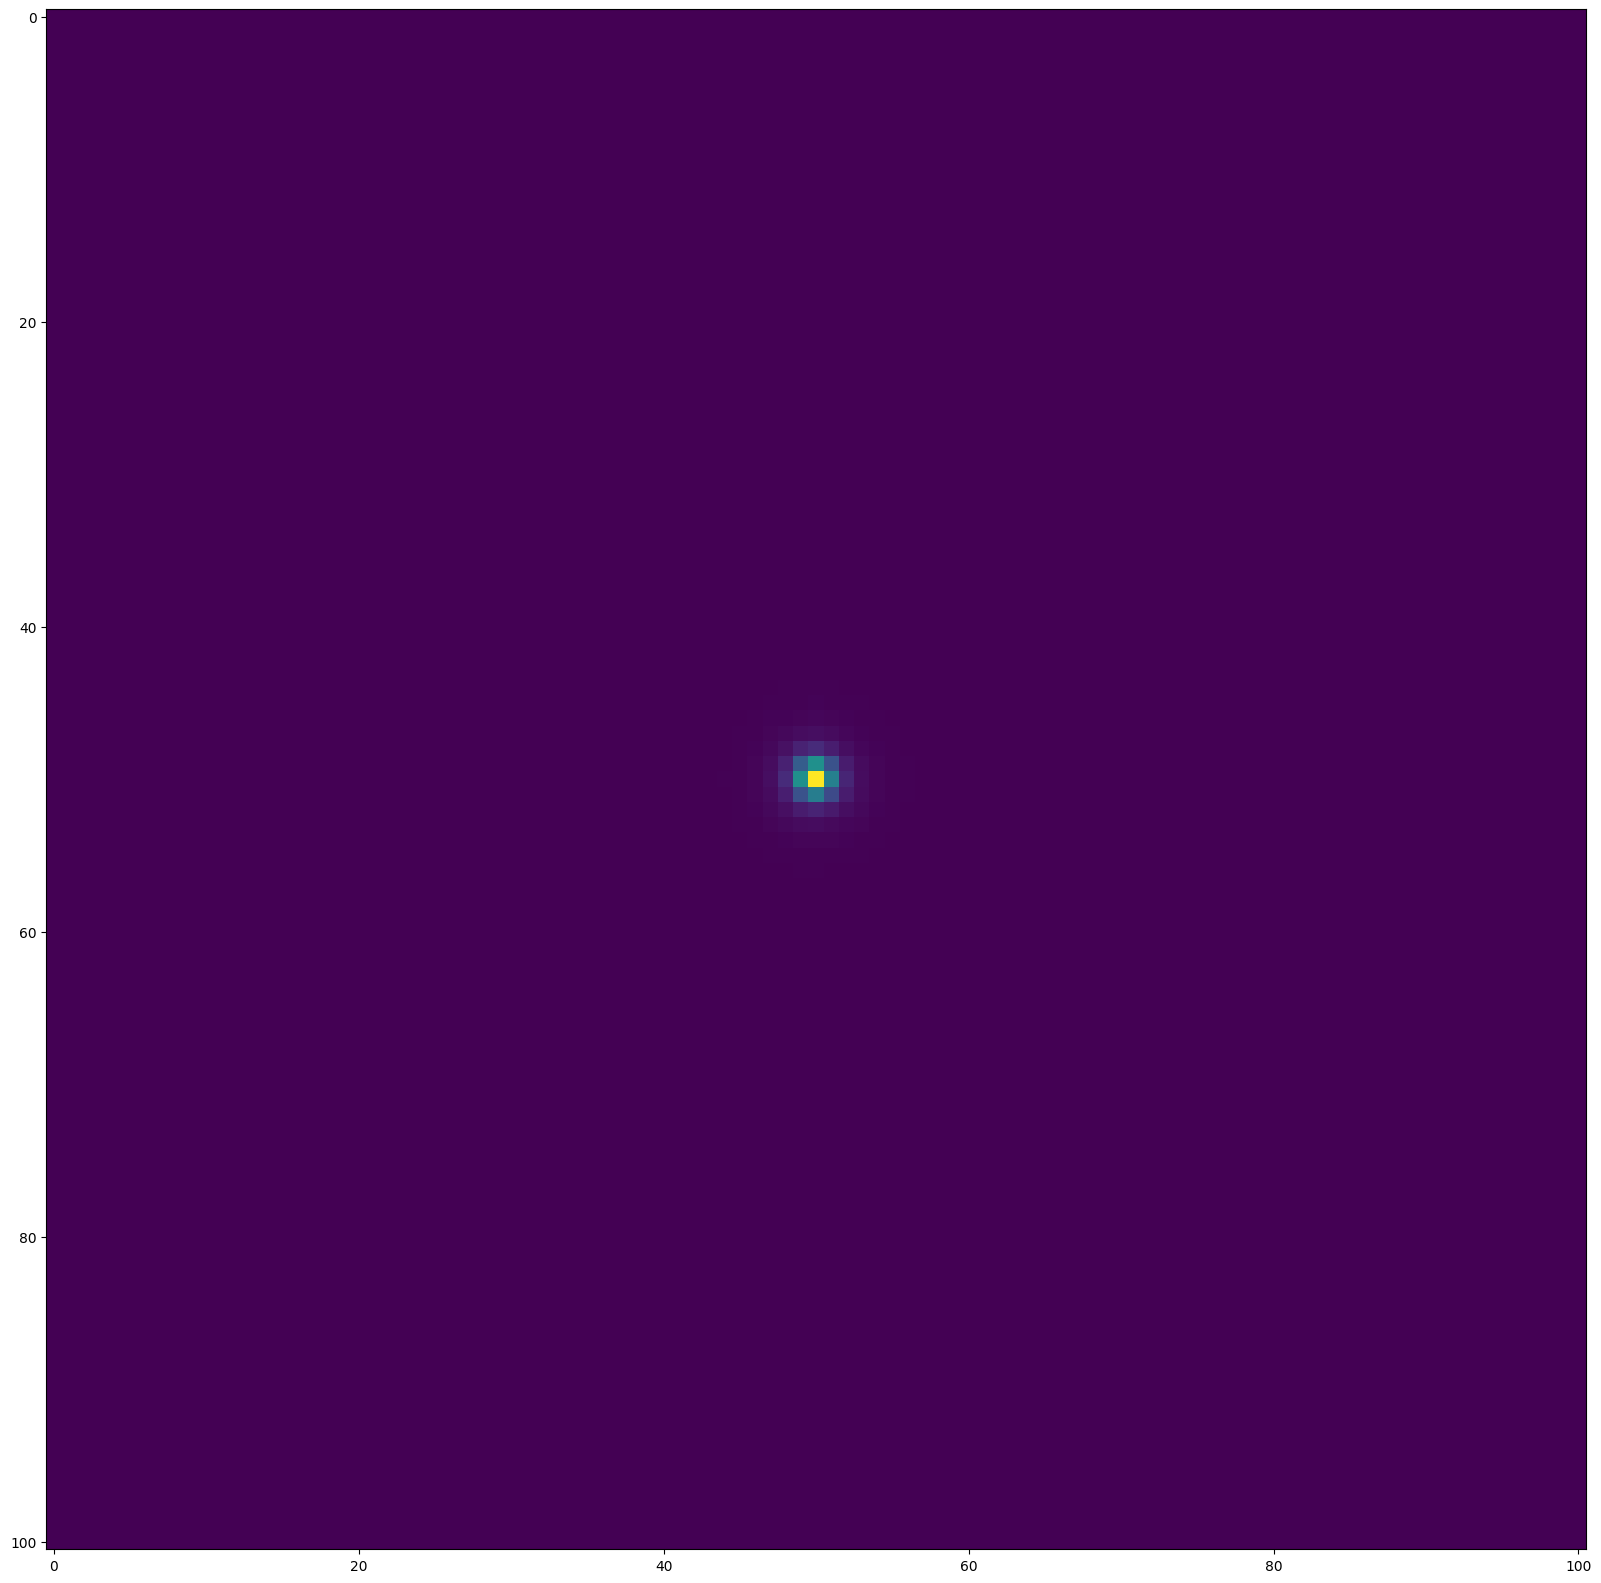

In [36]:
plt.imshow(std_neg_img)

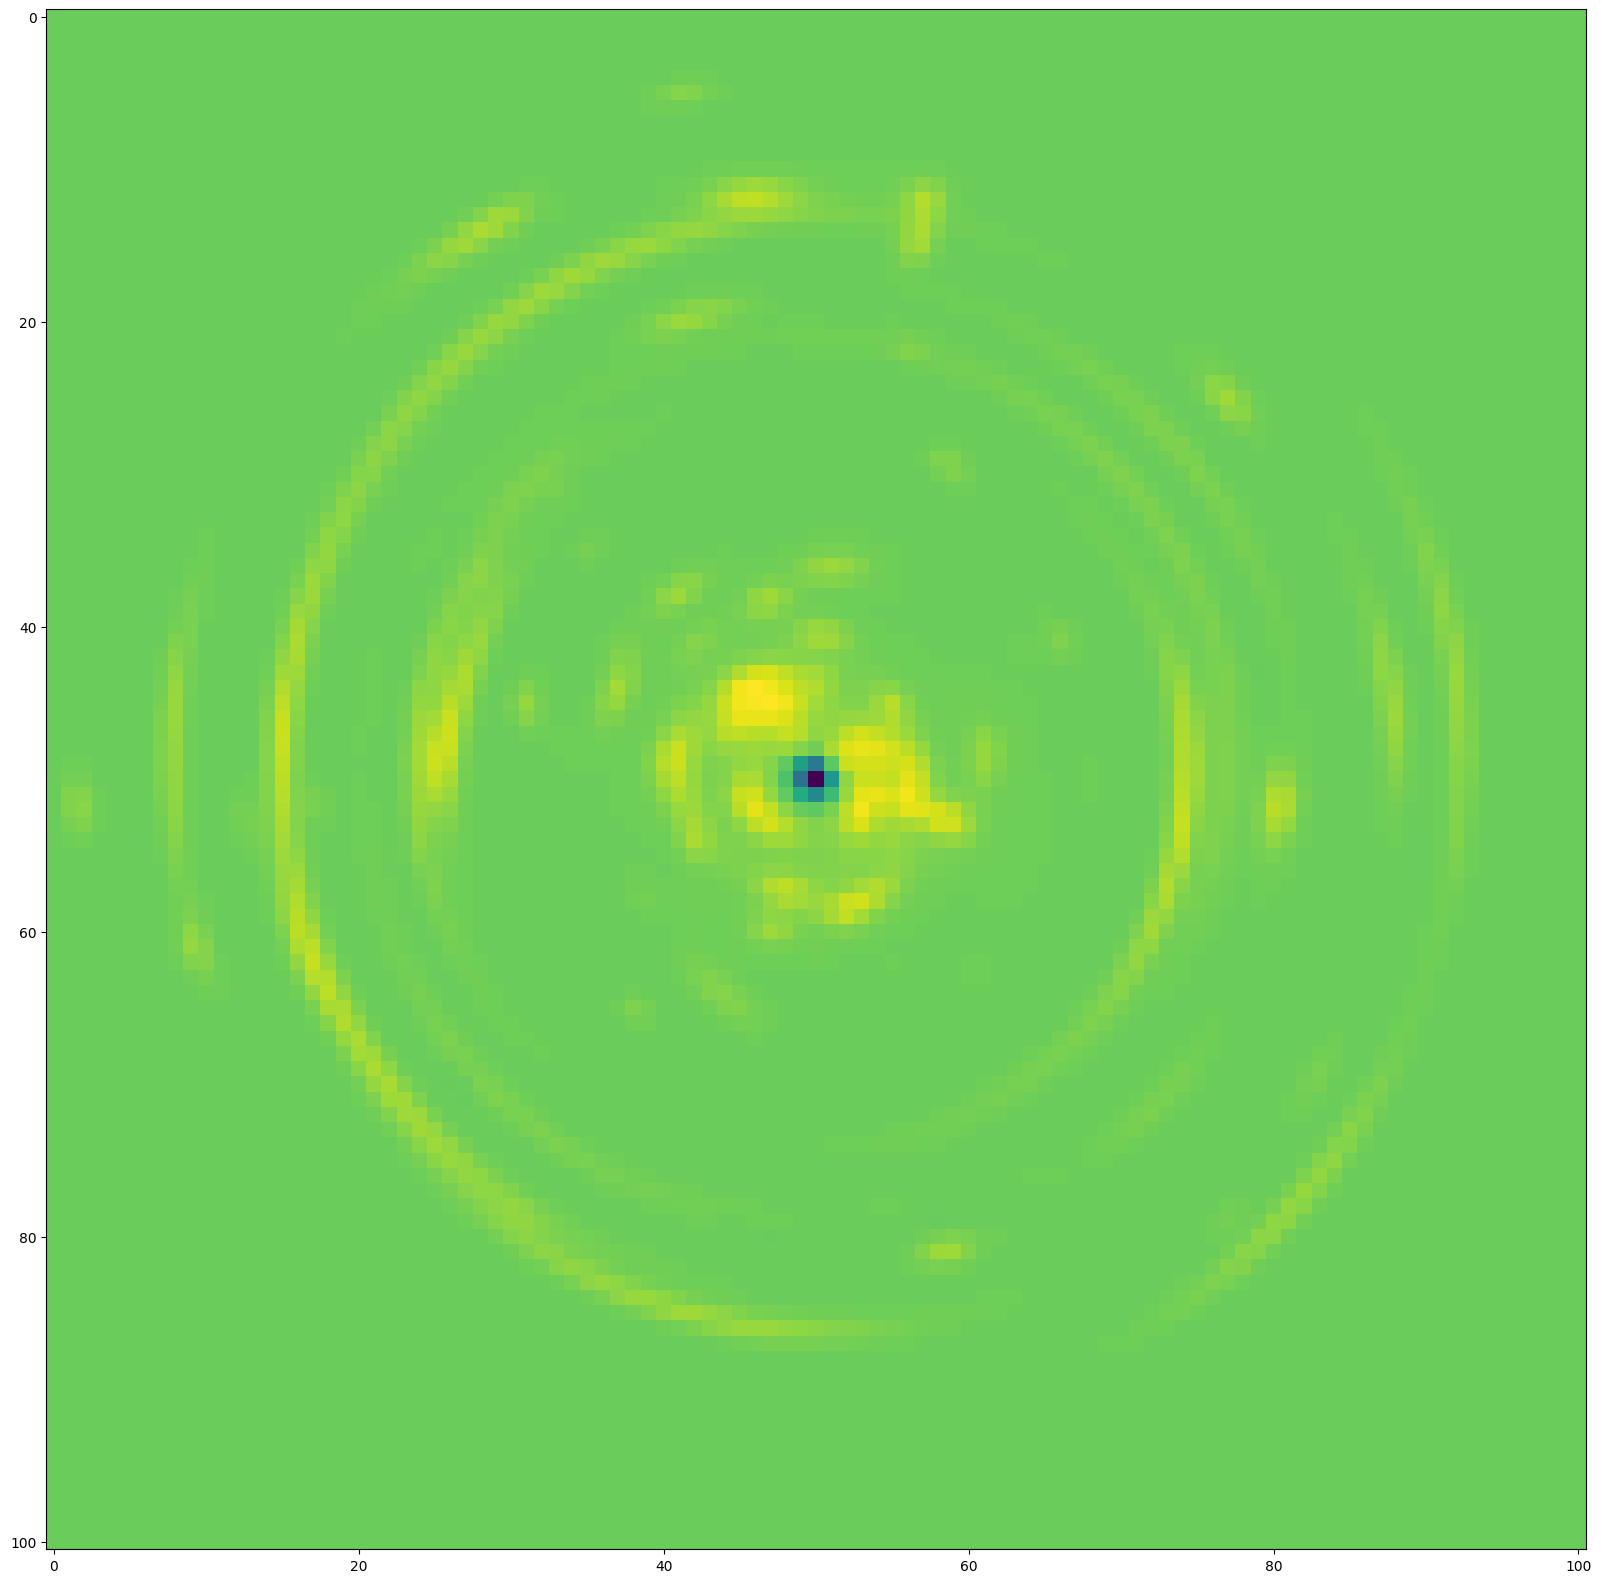

In [37]:
plt.imshow(std_pos_img - std_neg_img)

In [39]:
def display_multi_with_normalization_images(file_list, rows=3,columns=3,m_img=mean_img,s_img=std_img,fig_size=None):
  if fig_size:
    fig = plt.figure(figsize=fig_size)
  else:
    fig = plt.figure()

  
  for i in range(1, columns*rows +1):
    fig_path = f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{file_list[i-1]}.fits"
    img = read_fits_file(fig_path)
    
    img = (img - m_img)/s_img
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
  plt.show()

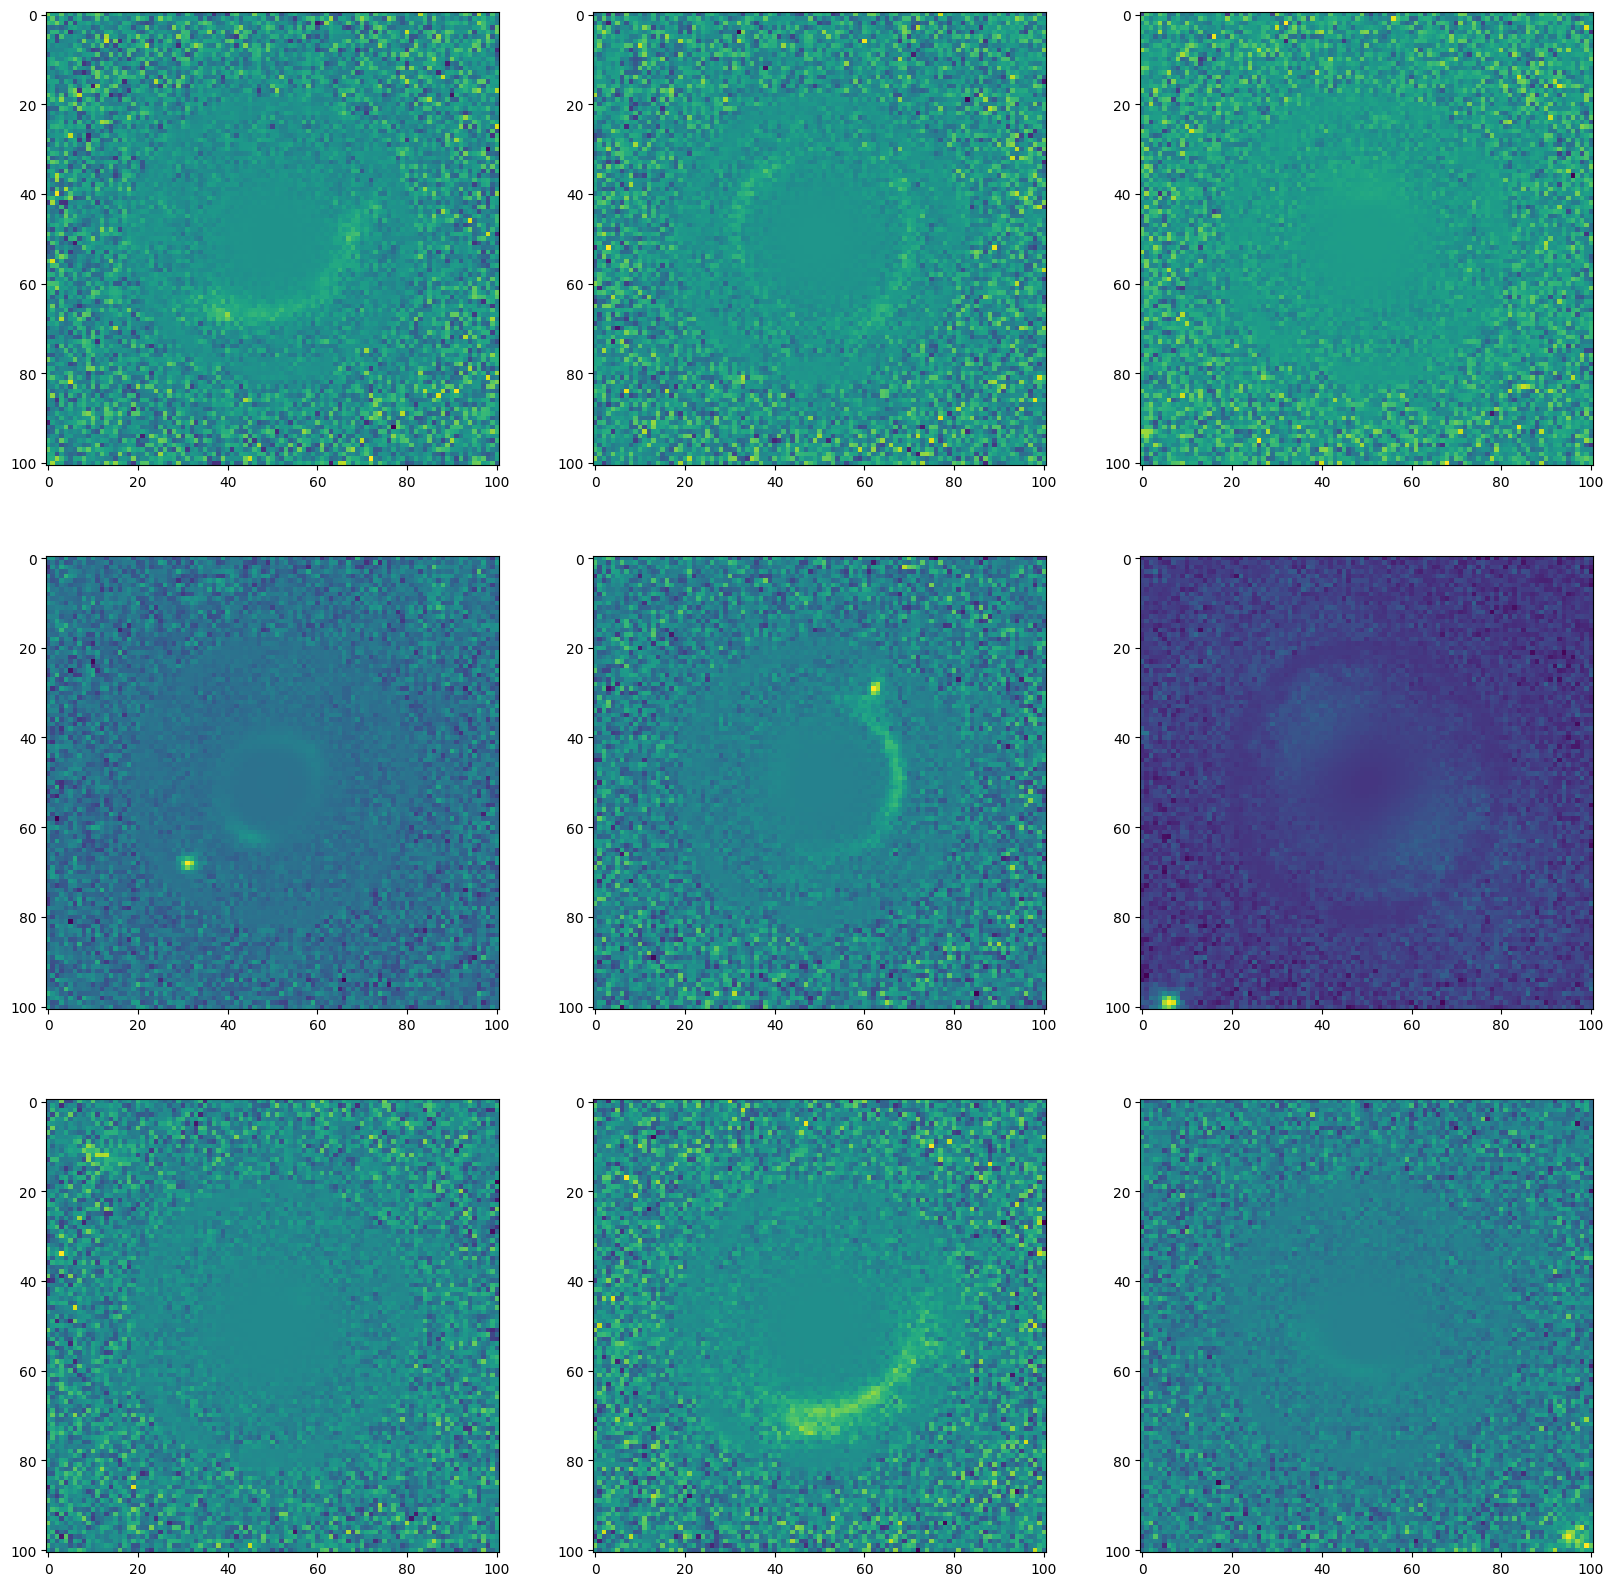

In [44]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 1]["ID"],15)
display_multi_with_normalization_images(ids,m_img=neg_mean_img,s_img=std_neg_img)

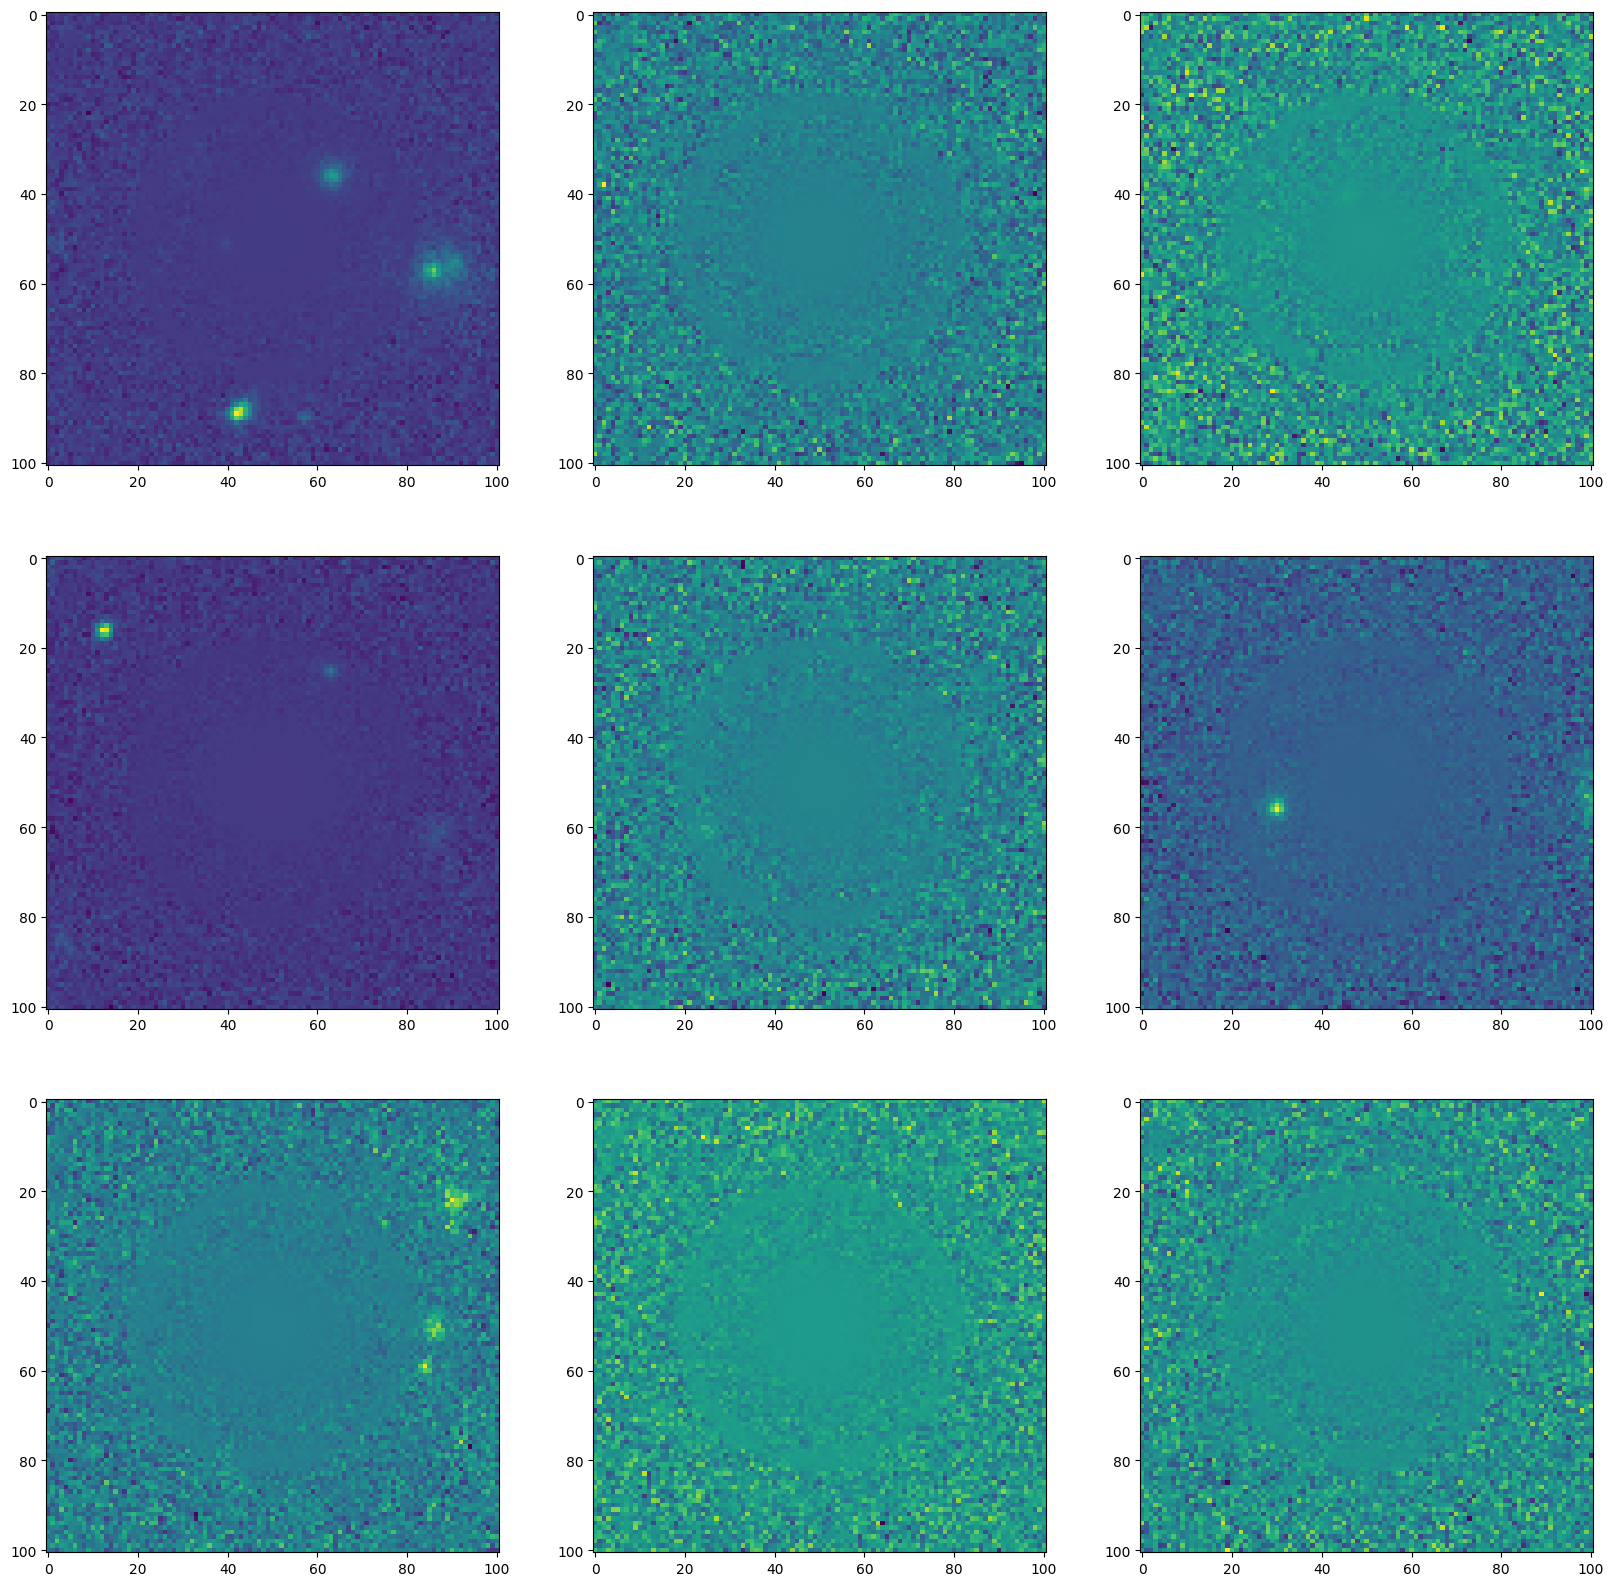

In [45]:
ids = np.random.choice(anno_file.loc[anno_file["is_lens"] == 0]["ID"],15)
display_multi_with_normalization_images(ids,m_img=neg_mean_img,s_img=std_neg_img)

In [47]:
save_arrays = {
    "mean_overall":mean_img,
    "mean_pos":pos_mean_img,
    "mean_neg":neg_mean_img,
    "std_overall":std_img,
    "std_pos":std_pos_img,
    "std_neg":std_neg_img
}

np.savez("image_stats.npz",**save_arrays)